In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

# Need for this homework
import geopandas as gpd
import contextily as cx

plt.style.use('default')
# This next line tells jupyter to render the images inline
%matplotlib inline
import matplotlib_inline


In [51]:
#combine all files into one big df
df1 = pd.read_csv('./data/transit_dfs/BUS01_df.csv')
df2 = pd.read_csv('./data/transit_dfs/BUS02_df.csv')
df3 = pd.read_csv('./data/transit_dfs/BUS03_df.csv')
df4 = pd.read_csv('./data/transit_dfs/BUS04_df.csv')
df5 = pd.read_csv('./data/transit_dfs/BUS05_df.csv')
df6 = pd.read_csv('./data/transit_dfs/BUS06_df.csv')
#df7 = pd.read_csv('./data/transit_dfs/BUS07_df.csv') theres nothing in this csv
df8 = pd.read_csv('./data/transit_dfs/TRX01_df.csv')
df9 = pd.read_csv('./data/transit_dfs/TRX02_df.csv')
df10 = pd.read_csv('./data/transit_dfs/TRX03_df.csv')

#df4.rename(columns={'ES405_PM1_Concentration_ug/m3':'ES642_PM2.5_Concentration_ug/m3'}, inplace=True)
df5.rename(columns={'ES405_PM1_Concentration_ug/m3':'ES642_PM2.5_Concentration_ug/m3'}, inplace=True)
df6.rename(columns={'ES405_PM1_Concentration_ug/m3':'ES642_PM2.5_Concentration_ug/m3'}, inplace=True)

bigDF = pd.concat([df1, df2, df3, df4, df5, df6, df8, df9, df10])
df = bigDF[['Timestamp_UTC','Latitude_ddeg','Longitude_ddeg','Elevation_m','ES642_PM2.5_Concentration_ug/m3','Time_Tuple','Date','Year','Month','Day_of_Year','Day_of_Month','Minute','Hour','Transit_ID','AQI','PM2.5_Category','Meso_West_Category']]

# #get just the rows we want
# df = bigDF[['Timestamp_UTC','Latitude_ddeg','Longitude_ddeg','Elevation_m','ES642_PM2.5_Concentration_ug/m3','Time_Tuple','Date','Year','Month','Day_of_Year','Day_of_Month','Minute','Hour','Transit_ID','AQI','PM2.5_Category','Meso_West_Category']]
# df.to_csv('./data/transit_dfs/compressedAllDF.csv')

4155413


In [ ]:
# #Reducing the data to just the columns that we need
# #Manually go into allDF and delete the firs row that is ',0,1,2,3,4,...'
# df = pd.read_csv('./data/transit_dfs/allDF.csv')
# df = df[['Timestamp_UTC','Latitude_ddeg','Longitude_ddeg','Elevation_m','ES642_PM2.5_Concentration_ug/m3','Time_Tuple','Date','Year','Month','Day_of_Year','Day_of_Month','Minute','Hour','Transit_ID','AQI','PM2.5_Category','Meso_West_Category']]
# df.to_csv('./data/transit_dfs/compressedAllDF.csv')
# df.head()

In [ ]:
# create east and west data frames along state street
df = pd.read_csv('./data/transit_dfs/compressedAllDF.csv')

westBin = df[df['Longitude_ddeg'] <= -111.888245][df['Longitude_ddeg'] >= -112.037638][df['Latitude_ddeg'] >= 40.660287][df['Latitude_ddeg'] <= 40.771445] #west valley bin
northEastBin = df[df['Longitude_ddeg'] <= -111.829276][df['Longitude_ddeg'] >= -111.888034][df['Latitude_ddeg'] >= 40.733488][df['Latitude_ddeg'] <= 40.778714] #north east bin
southEastBin = df[df['Longitude_ddeg'] <= -111.819370][df['Longitude_ddeg'] >= -111.888034][df['Latitude_ddeg'] >= 40.662768][df['Latitude_ddeg'] <= 40.733488] #south bin

west_monthly_avg = westBin.groupby(['Year', 'Month'])['ES642_PM2.5_Concentration_ug/m3'].mean().reset_index()
northEast_monthly_avg = northEastBin.groupby(['Year', 'Month'])['ES642_PM2.5_Concentration_ug/m3'].mean().reset_index()
southEast_monthly_avg = southEastBin.groupby(['Year', 'Month'])['ES642_PM2.5_Concentration_ug/m3'].mean().reset_index()
northEast_monthly_avg['Month'] = pd.to_datetime(northEast_monthly_avg[['Year', 'Month']].assign(DAY=1))
west_monthly_avg['Month'] = pd.to_datetime(west_monthly_avg[['Year', 'Month']].assign(DAY=1))
southEast_monthly_avg['Month'] = pd.to_datetime(southEast_monthly_avg[['Year', 'Month']].assign(DAY=1))
combined_monthly_avg = pd.concat([northEast_monthly_avg, west_monthly_avg, southEast_monthly_avg], keys=['North East', 'West', 'South East'])
plt.figure(figsize=(20, 6))
for region, data in combined_monthly_avg.groupby(level=0):
    plt.plot(data['Month'], data['ES642_PM2.5_Concentration_ug/m3'], label=region, linestyle='-')

plt.title('North East Divide')
plt.xlabel('Year')
plt.ylabel('Average Concentration (ug/m3)')
plt.legend()
plt.grid(True)
plt.show()

# #Here is if instead of a dividing along state street, we divided along 300 west
# # 40.7498391375391, -111.87679800324055
# westDF = df[df['Longitude_ddeg'] < -111.899664]
# eastDF = df[df['Longitude_ddeg'] >= -111.876798]
# west_monthly_avg = westDF.groupby(['Year', 'Month'])['ES642_PM2.5_Concentration_ug/m3'].mean().reset_index()
# east_monthly_avg = eastDF.groupby(['Year', 'Month'])['ES642_PM2.5_Concentration_ug/m3'].mean().reset_index()
# east_monthly_avg['Month'] = pd.to_datetime(east_monthly_avg[['Year', 'Month']].assign(DAY=1))
# west_monthly_avg['Month'] = pd.to_datetime(west_monthly_avg[['Year', 'Month']].assign(DAY=1))
# combined_monthly_avg = pd.concat([east_monthly_avg, west_monthly_avg], keys=['East', 'West'])
# plt.figure(figsize=(20, 6))
# for region, data in combined_monthly_avg.groupby(level=0):
#     plt.plot(data['Month'], data['ES642_PM2.5_Concentration_ug/m3'], label=region, linestyle='-')

# plt.title('300 West Divide')
# plt.xlabel('Year')
# plt.ylabel('Average Concentration (ug/m3)')
# plt.legend()
# plt.grid(True)
# plt.show()

westBin.head()

In [ ]:
# I'm curious to see if elevation has any effect on PM2.5 concentration
# SLC's elevation is 4265ft (1300 meters)

# just going to rule out any obvious outliers
elevationDF = df[df['Elevation_m'] < 1400][df['Elevation_m'] > 1200]

plt.scatter(elevationDF['Elevation_m'], elevationDF['ES642_PM2.5_Concentration_ug/m3'], alpha = .01, color='red')
plt.title('Scatter Plot of ES642_PM2.5_Concentration vs. Elevation')
plt.xlabel('Elevation (m)')
plt.ylabel('ES642_PM2.5_Concentration_ug/m3')
plt.show()

### Daily East vs West Line Graph

C:\Users\johns\AppData\Local\Temp\ipykernel_2268\1835921803.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  westBin = df[df['Longitude_ddeg'] <= -111.904736][df['Latitude_ddeg'] >= 40.633707]#west valley bin
C:\Users\johns\AppData\Local\Temp\ipykernel_2268\1835921803.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  eastBin = df[df['Longitude_ddeg'] >= -111.904736][df['Latitude_ddeg'] >= 40.633707]#east bench bin


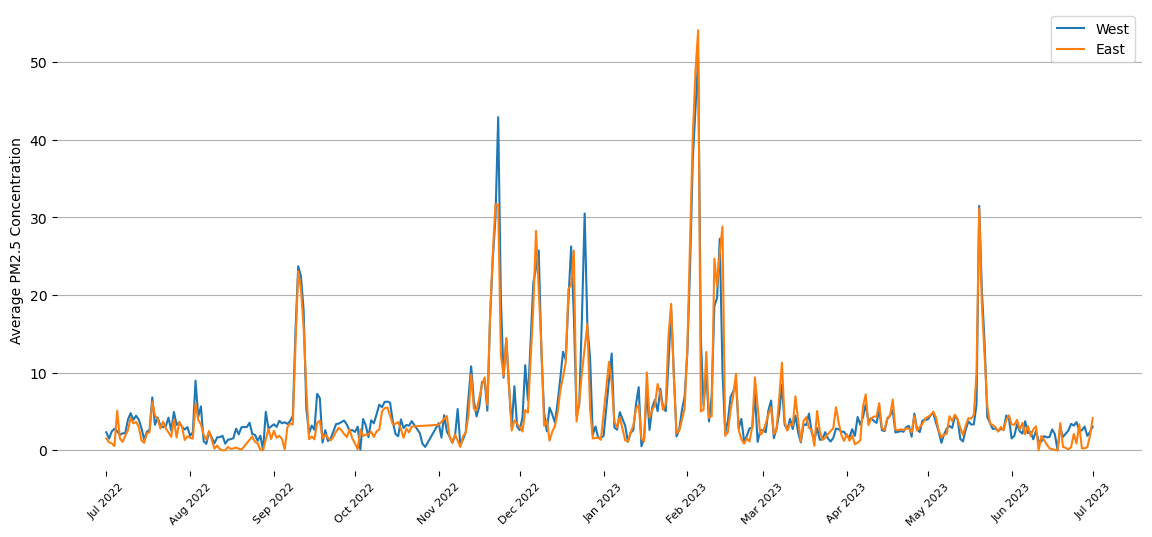

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter

df = pd.read_csv('./data/transit_dfs/compressedAllDF.csv')
# westBin = df[df['Longitude_ddeg'] <= -111.888245][df['Longitude_ddeg'] >= -112.037638][df['Latitude_ddeg'] >= 40.660287][df['Latitude_ddeg'] <= 40.771445] #west valley bin
# eastBin = df[df['Longitude_ddeg'] <= -111.829276][df['Longitude_ddeg'] >= -111.888034][df['Latitude_ddeg'] >= 40.662768][df['Latitude_ddeg'] <= 40.778714] #east bench bin
westBin = df[df['Longitude_ddeg'] <= -111.904736][df['Latitude_ddeg'] >= 40.633707]#west valley bin
eastBin = df[df['Longitude_ddeg'] >= -111.904736][df['Latitude_ddeg'] >= 40.633707]#east bench bin

plt.figure(figsize=(14, 6))
# Convert 'Date' column to datetime format
def plot_dataframe(df, label):
    # Convert 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Filter data for the specified date range (July 2022 to July 2023)
    start_date = '2022-07-01'
    end_date = '2023-07-01'
    filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

    # Group by 'Date' and calculate the average of 'ES642_PM2.5_Concentration_ug/m3'
    daily_avg = filtered_df.groupby('Date')['ES642_PM2.5_Concentration_ug/m3'].mean().reset_index()

    # Plot the line for the given dataframe
    plt.plot(daily_avg['Date'], daily_avg['ES642_PM2.5_Concentration_ug/m3'], linestyle='-', label=label)

plot_dataframe(westBin, label='West')
plot_dataframe(eastBin, label='East')
plt.gca().xaxis.set_major_locator(MonthLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%b %Y'))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.xticks(fontsize=8)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()
plt.ylabel('Average PM2.5 Concentration')
plt.show()

### Specific Day #1: Jan 13, 2022 

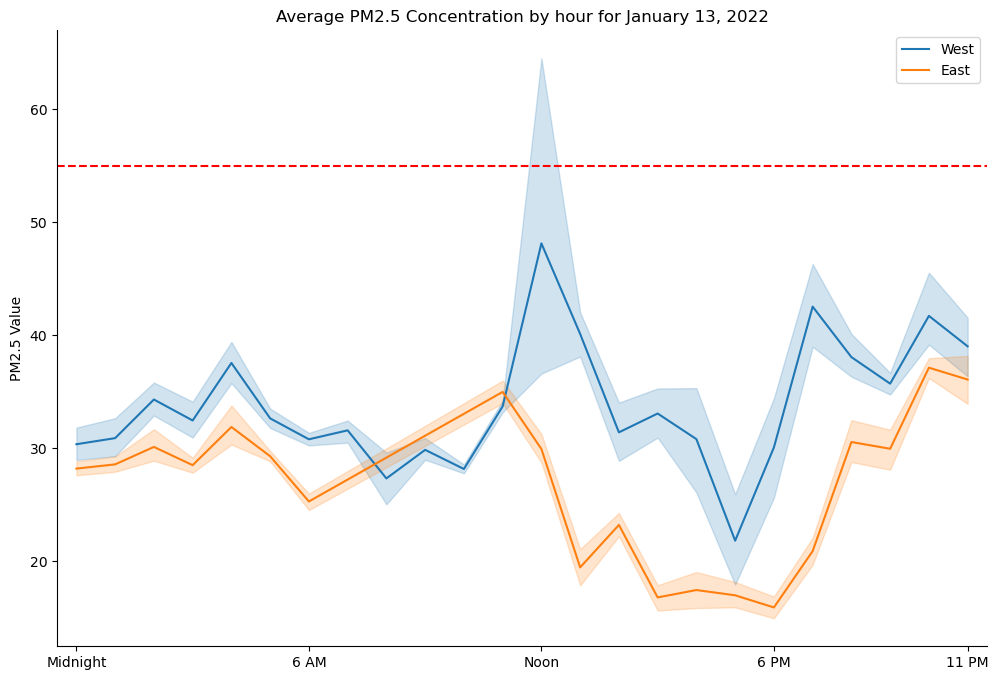

In [72]:
# Filter data for the specified date
from tkinter import CENTER


date_to_plot = '2022-01-13'
filtered_westBin = westBin[westBin['Date'] == date_to_plot]
filtered_eastBin = eastBin[eastBin['Date'] == date_to_plot]


plt.figure(figsize=(12, 8))
sns.lineplot(x='Hour', y='ES642_PM2.5_Concentration_ug/m3', data=filtered_westBin, label='West')
sns.lineplot(x='Hour', y='ES642_PM2.5_Concentration_ug/m3', data=filtered_eastBin, label='East')
#sns.violinplot(x='Hour', y='ES642_PM2.5_Concentration_ug/m3', data=westBin, inner='quartile')


# Set labels and title
plt.title('Average PM2.5 Concentration by hour for January 13, 2022')
plt.ylabel('PM2.5 Value')
plt.xlabel('')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks([0, 6, 12, 18, 23], ['Midnight', '6 AM', 'Noon', '6 PM', '11 PM'])
plt.xlim(-.5, 23.5)

plt.show()


### Specific Day #2: August 6, 2021

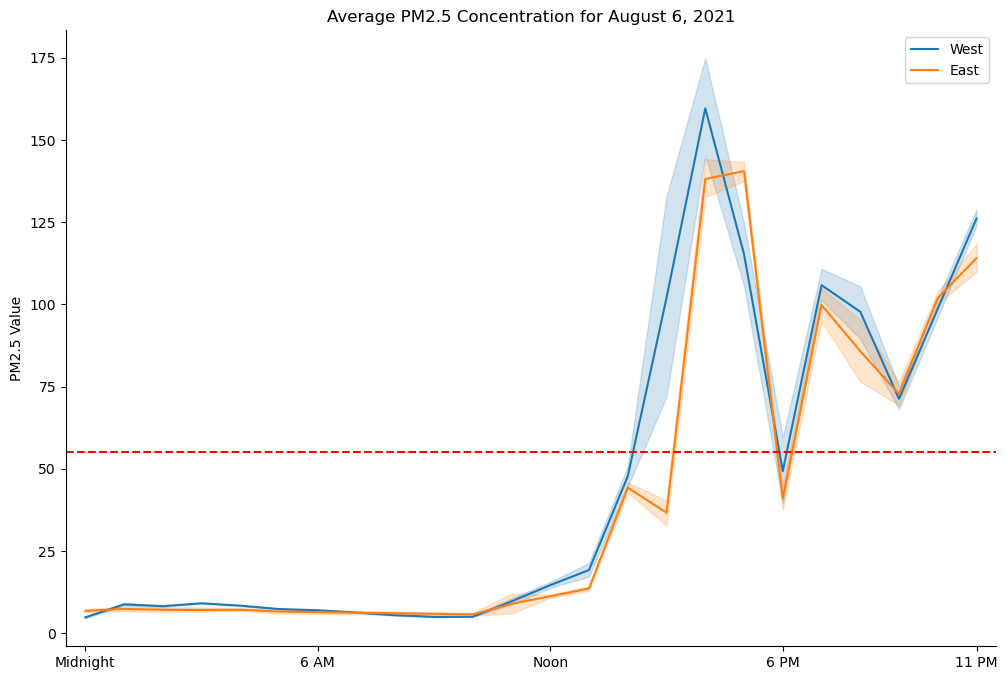

east count: 1060956 west count: 1948429


In [71]:
# Filter data for the specified date
date_to_plot = '2021-08-06'
filtered_westBin = westBin[westBin['Date'] == date_to_plot]
filtered_eastBin = eastBin[eastBin['Date'] == date_to_plot]


plt.figure(figsize=(12, 8))
sns.lineplot(x='Hour', y='ES642_PM2.5_Concentration_ug/m3', data=filtered_westBin, label='West')
sns.lineplot(x='Hour', y='ES642_PM2.5_Concentration_ug/m3', data=filtered_eastBin, label='East')
#sns.violinplot(x='Hour', y='ES642_PM2.5_Concentration_ug/m3', data=westBin, inner='quartile')

# Add a horizontal line at y=55
plt.axhline(y=55, color='red', linestyle='--', label='Threshold')


# Set labels and title
plt.title('Average PM2.5 Concentration for August 6, 2021')
plt.ylabel('PM2.5 Value')
plt.xlabel('')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks([0, 6, 12, 18, 23], ['Midnight', '6 AM', 'Noon', '6 PM', '11 PM'])
plt.xlim(-.5, 23.5)
plt.show()

print("east count: " + str(eastBin['Hour'].count()) + " west count: " + str(westBin['Hour'].count()))